In [100]:
import pandas as pd

timestamp_df = pd.read_csv('../dataset/transactions_train.csv')

In [101]:
timestamp_column = 't_dat'
timestamp_df[timestamp_column] = pd.to_datetime(timestamp_df[timestamp_column], format='%Y-%m-%d')

# Time intervals
timestamp_1 = "2019-09-23"
timestamp_2 = "2019-09-30"
t1 = timestamp_df[timestamp_column].searchsorted(timestamp_1)
t2 = timestamp_df[timestamp_column].searchsorted(timestamp_2)

cutout = timestamp_df.iloc[t1:t2 - 1]
timestamp_wo_sales = timestamp_df.drop(timestamp_df.index[t1:t2-1], inplace=False)

timestamp_1 = "2019-09-01"
timestamp_2 = "2019-10-01"
t1 = timestamp_df[timestamp_column].searchsorted(timestamp_1)
t2 = timestamp_df[timestamp_column].searchsorted(timestamp_2)
cutout_whole_sept = timestamp_df.iloc[t1:t2-1]
cutout

,t_dat,customer_id,article_id,price,sales_channel_id
16889901,2019-09-23,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,743722002,0.016932,2
16889902,2019-09-23,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,768503001,0.020322,2
16889903,2019-09-23,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,753061003,0.010153,2
16889904,2019-09-23,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,748140001,0.015237,2
16889905,2019-09-23,0008804a45e7fbc8653ba8f5ce15880cb966ca220c52d2...,748140001,0.015237,2
...,...,...,...,...,...
17313319,2019-09-29,ffeeb69582892b79205ec19f7ac0d9633a04369a4357f9...,652956002,0.016034,1
17313320,2019-09-29,ffeeb69582892b79205ec19f7ac0d9633a04369a4357f9...,372860001,0.012831,1
17313321,2019-09-29,ffeeb69582892b79205ec19f7ac0d9633a04369a4357f9...,695632001,0.032102,1
17313322,2019-09-29,fff2c0da0dae66718c16c03b8ba64e7c6bdfb00e87ceaf...,772773002,0.008458,1


In [102]:
# For each item retrieve mean price in September
mean_sept = cutout_whole_sept.groupby('article_id').mean()
mean_sept

,price,sales_channel_id
article_id,,
108775015,0.007996,1.500000
108775044,0.008114,1.833333
110065001,0.016025,1.368421
110065002,0.018305,1.555556
110065011,0.021866,1.000000
...,...,...
844413001,0.022715,2.000000
844915002,0.058577,2.000000
845541001,0.062366,2.000000


In [103]:
# For each item retrieve mean in sales week

mean_salesW = cutout.groupby('article_id').mean()
# Actually this information is quite interesting for the salses channel since it shows how much an item 
# was bought online/physically (2 = OFFLINE and 1 = ONLINE)
mean_salesW

,price,sales_channel_id
article_id,,
108775015,0.007731,1.428571
108775044,0.007328,2.000000
110065001,0.017308,1.714286
110065002,0.018881,1.600000
110065011,0.022638,1.000000
...,...,...
844413001,0.020322,2.000000
844915002,0.057025,2.000000
845541001,0.061362,2.000000


In [120]:
# Keep average prices only for items sold in sales week
result = mean_salesW.join(mean_sept, how="inner", lsuffix='_sales', rsuffix='_avg')
# negative shift in sales_channel = MOVE TO ONLINE, + shift = MOVE TO OFFLINE
result

,price_sales,sales_channel_id_sales,price_avg,sales_channel_id_avg
article_id,,,,
108775015,0.007731,1.428571,0.007996,1.500000
108775044,0.007328,2.000000,0.008114,1.833333
110065001,0.017308,1.714286,0.016025,1.368421
110065002,0.018881,1.600000,0.018305,1.555556
110065011,0.022638,1.000000,0.021866,1.000000
...,...,...,...,...
844413001,0.020322,2.000000,0.022715,2.000000
844915002,0.057025,2.000000,0.058577,2.000000
845541001,0.061362,2.000000,0.062366,2.000000


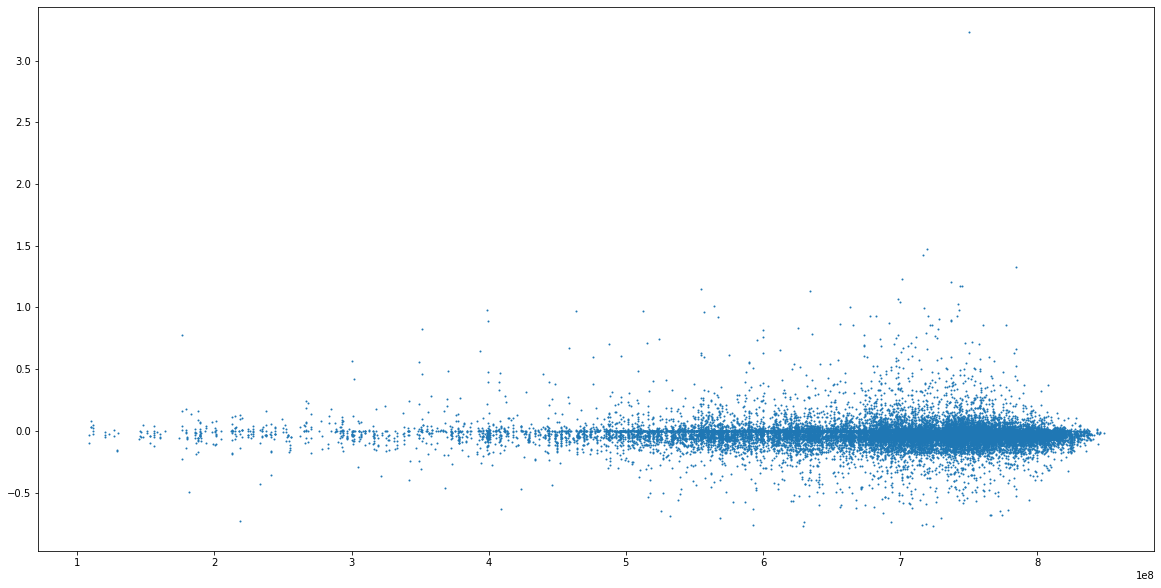

In [121]:
# See how much prices change
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(result.index, (result['price_sales']-result['price_avg'])/result['price_avg'], s=1)
plt.show()

In [106]:
#Nice facts about this plot
graph_scatter = (result['price_sales']-result['price_avg'])/result['price_avg']
print("Mean discount percentage: {:2.3}%".format(graph_scatter.mean()*100))
print("Max discount percentage: {:2.3}%".format(graph_scatter.min()*100))
print("Max increase in price compared to avg: {:3.4}%".format(graph_scatter.max()*100))

Mean discount percentage: -2.9%
Max discount percentage: -77.1%
Max increase in price compared to avg: 323.2%


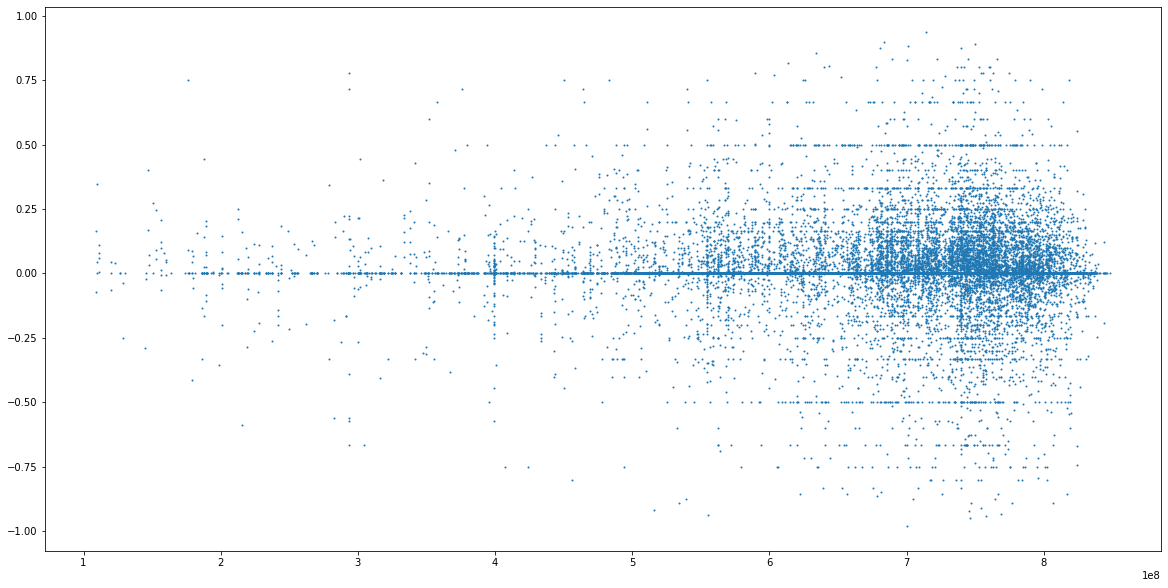

In [117]:
# How did the channel change during discount?
# negative shift in sales_channel = MOVE TO ONLINE, + shift = MOVE TO OFFLINE
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(result.index, result['sales_channel_id_sales'] - result['sales_channel_id_avg'], s=1)
plt.show()

In [108]:
# Basic facts about the plot
graph_scatter = result['sales_channel_id_sales'] - result['sales_channel_id_avg']
print("Mean shift: {:2.3}".format(graph_scatter.mean()))
print("Min shift: {:3.4}".format(graph_scatter.min()))
print("Max shift: {:3.4}".format(graph_scatter.max()))

Mean shift: 0.0143
Min shift: -0.9804
Max shift: 0.9375


In [118]:
# A deeper look into the 28th which is an outlier
# Time intervals
timestamp_1 = "2019-09-28"
timestamp_2 = "2019-09-29"
t1 = cutout[timestamp_column].searchsorted(timestamp_1)
t2 = cutout[timestamp_column].searchsorted(timestamp_2)

peak_day_df = cutout.iloc[t1:t2 - 1]
cutout_no_peak = cutout.drop(cutout.index[t1:t2-1], inplace=False)

# 
mean_peak_day = peak_day_df.groupby('article_id').mean()
mean_rest_of_week = cutout_no_peak.groupby('article_id').mean()

# Keep average prices only for items sold in sales week
result = mean_peak_day.join(mean_rest_of_week, how="inner", lsuffix='_peak', rsuffix='_avg')
result

,price_peak,sales_channel_id_peak,price_avg,sales_channel_id_avg
article_id,,,,
108775015,0.006763,1.666667,0.008458,1.25
108775044,0.006763,2.000000,0.008458,2.00
110065001,0.015958,1.666667,0.025407,2.00
110065002,0.013542,2.000000,0.020216,1.50
110065011,0.024525,1.000000,0.021695,1.00
...,...,...,...,...
843545001,0.040661,2.000000,0.045746,2.00
844915002,0.053743,2.000000,0.066872,2.00
845541001,0.054356,2.000000,0.066552,2.00


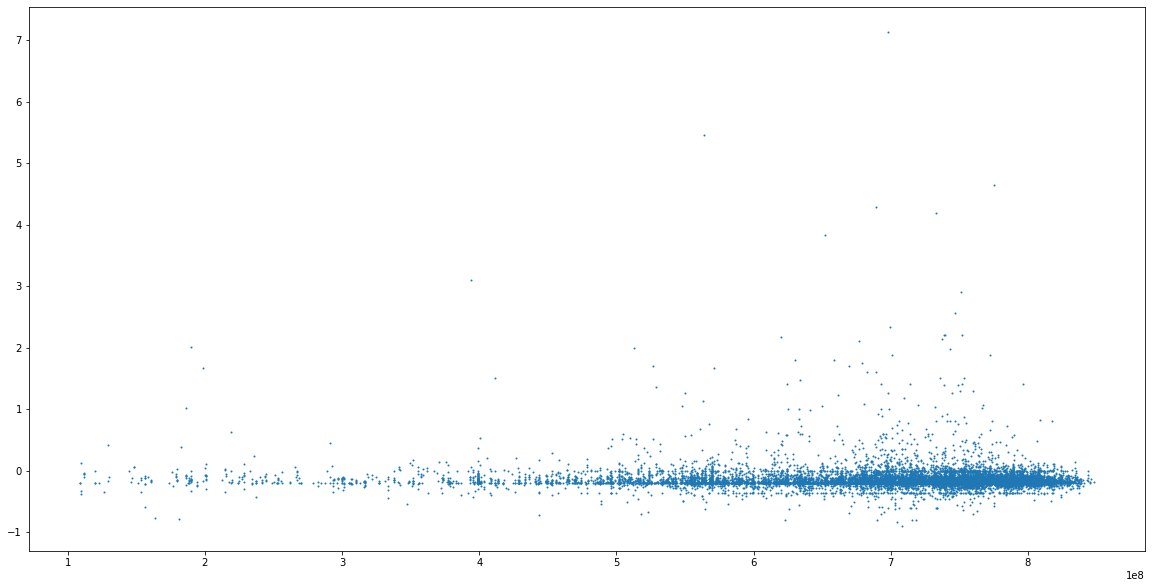

In [119]:
# Difference between the week and 28th September
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(result.index, (result['price_peak']-result['price_avg'])/result['price_avg'], s=1)
plt.show()

In [114]:
# Basic facts about the plot
graph_scatter = (result['price_peak'] - result['price_avg']) / result['price_avg']
print("Mean shift: {:3.4}%".format(graph_scatter.mean()*100))
print("Min shift: {:3.4}%".format(graph_scatter.min()*100))
print("Max shift: {:3.4}%".format(graph_scatter.max()*100))


Mean shift: -14.07%
Min shift: -89.99%
Max shift: 713.3%


Clearly this day is different from the rest of the week, in terms of prices 

In [122]:
# How big is the volume of the 28th compared to the rest of the week?
print("The 28th is {:3.4}% of the whole week transactions".format(peak_day_df.shape[0]/cutout.shape[0]*100))

The 28th is 46.91% of the whole week transactions
